In [128]:
import cv2 as cv
import numpy as np
import pandas as pd
from datetime import datetime

# importing matplotlib module 
from matplotlib import pyplot as plt 

%matplotlib inline

In [163]:
def describe_data(numpy_array):
    df=pd.DataFrame({"a": numpy_array.flatten()})
    print(df.describe())

def plot_my_image(img,is_gray):
    img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
    fig = plt.figure(figsize = (12,12)) # create a 5 x 5 figure 
    ax = fig.add_subplot(111)
    
    today=datetime.now()
    today.isoformat()
    ax.set_title(today.isoformat(),fontsize = 20)
    if is_gray==True: 
        ax.imshow(img, interpolation='none',cmap='gray')
    elif is_gray==False:
        ax.imshow(img, interpolation='none')
    plt.show()

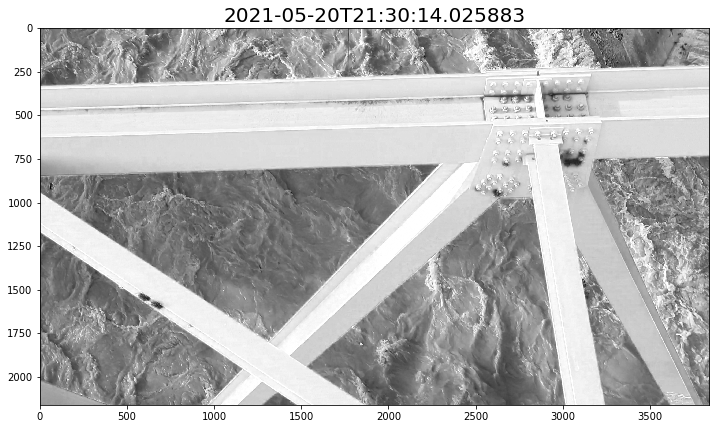

In [174]:
img = cv.imread("image.jpg", cv.IMREAD_UNCHANGED)
red_channel = img[:,:,2]
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plot_my_image(red_channel,False)

In [164]:
describe_data(red_channel)

                  a
count  8.294400e+06
mean   1.715150e+02
std    5.391496e+01
min    0.000000e+00
25%    1.210000e+02
50%    1.670000e+02
75%    2.220000e+02
max    2.550000e+02


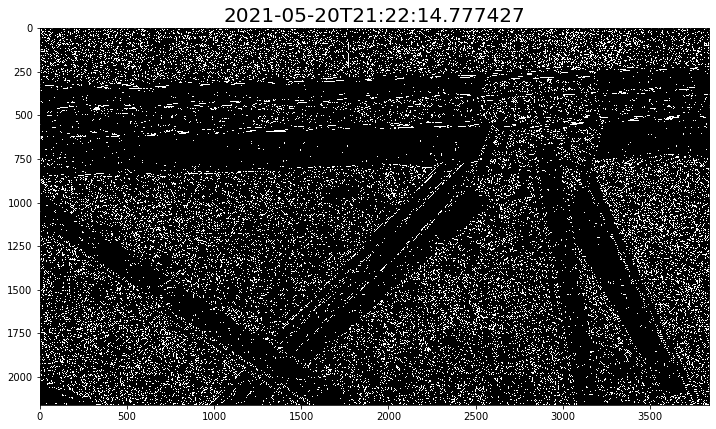

In [173]:
blurred = cv.GaussianBlur(red_channel,ksize= (5, 5), 0)

med_val = np.median(img) 
lower = int(max(0 ,0.7*median_pix))
upper = int(min(255,1.3*median_pix))

edges = cv.Canny(blurred,
                threshold1=lower,
                 threshold2=upper,
                 apertureSize = 5,
                L2gradient = True)

plot_my_image(edges,False)

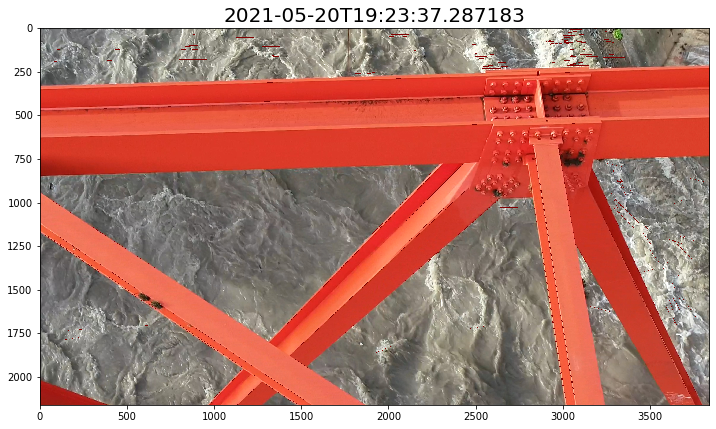

In [91]:
lines = cv.HoughLinesP(edges, 
                       1, 
                       np.pi/180,
                       threshold=100,
                       minLineLength=100,
                       maxLineGap=10)
temp_img=img
for line in lines:
   x1, y1, x2, y2 = line[0]
   cv.line(temp_img, (x1, y1), (x2, y2), (0, 0, 128), 1)
plot_my_image(temp_img,False)